In [2]:
from PIL import Image
from matplotlib import pyplot as plt
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from pprint import pprint

In [3]:
hdu = fits.open("./fits/RSM20240501T000640_0010_HA.fits")
hdu.info()

Filename: ./fits/RSM20240501T000640_0010_HA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2304, 2313)   int16   
  1  COMPRESSED_IMAGE    1 CompImageHDU     49   (2304, 2313, 118)   int16   


In [4]:
#chase数据在第二层，因此读第二个子文件
hdu_header = hdu[1].header
hdu_data = hdu[1].data
#查看头文件
hdu_header

XTENSION= 'IMAGE   '           / binary table extension                         
BITPIX  =                   16 / data type of original image                    
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                 2304 / Length of data axis 1 (slit dimension)         
NAXIS2  =                 2313 / Length of data axis 2 (scanning steps)         
NAXIS3  =                  118 / Length of data axis 3 (wavelength dimension)   
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TELESCOP= 'CHASE-HIS'          / Telescop Name                                  
BIN     =                    2 / Binning mode                                   
DATE_OBS= '2024-05-01T00:06:40' / Observation time                              
CRPIX1  =    1184.226659426613 / X coordinate of solar center in pixel          
CUNIT1  = 'arcsec  '        

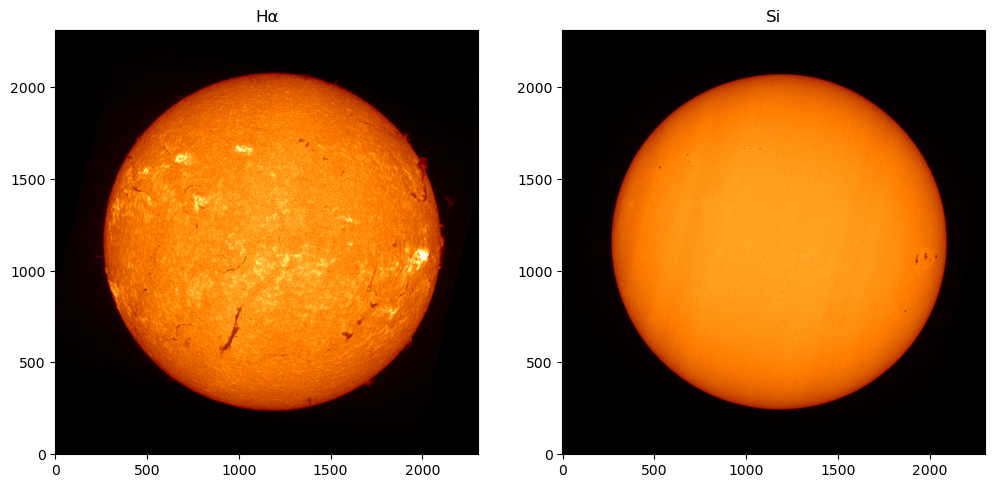

In [7]:
#画出Hα线心成像
map_HA = hdu_data[68]#Hα约在第69个波长点.hdu_data[68]或hdu_data[68,:,:]都行
map_SI = hdu_data[22]#Si I约在第23个波长点

plt.figure(figsize = (12,6))

plt.subplot(121)
plt.title('Hα')
#vmin. vmax为色表最大最小值， cmap = 'afmhot'是取'afmhot'色表， origin为坐标轴方向
plt.imshow(map_HA, vmin = 0, vmax = map_HA.mean()*4, cmap = 'afmhot', origin = 'lower')

plt.subplot(122)
plt.title('Si')
plt.imshow(map_SI, vmin = 0, vmax = map_SI.mean()*4, cmap = 'afmhot', origin = 'lower')
plt.show()

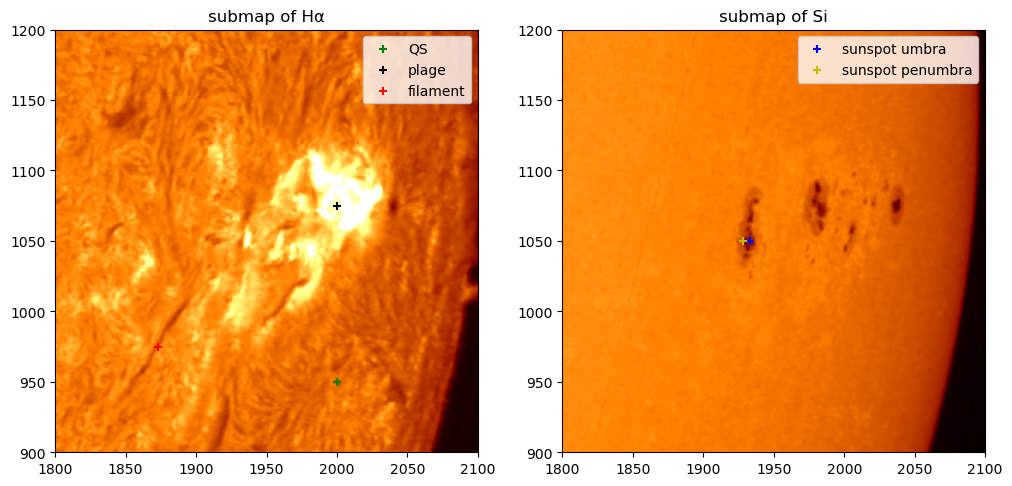

In [8]:
coords = [[2000,950],[2000,1075],[1873,975],[1933,1050],[1928,1050]]#宁静区,谱斑,暗条,黑子本影,黑子半影
labels = ["QS","plage","filament","sunspot umbra","sunspot penumbra"]
colors = ['g','k','r','b','y']

#查看局部局部成像
plt.figure(figsize = (12,6))

plt.subplot(121)
plt.title('submap of Hα')
plt.ylim(900, 1200)
plt.xlim(1800, 2100)
plt.imshow(map_HA, vmin = 0, vmax = map_HA.mean()*4, cmap = 'afmhot', origin = 'lower')
for i in range(3):
    plt.scatter(coords[i][0], coords[i][1], marker = '+', color = colors[i], label = labels[i])
plt.legend()

plt.subplot(122)
plt.title('submap of Si')
plt.ylim(900, 1200)
plt.xlim(1800, 2100)
plt.imshow(map_SI, vmin = 0, vmax = map_SI.mean()*4, cmap = 'afmhot', origin = 'lower')
for i in range(3,5):
    plt.scatter(coords[i][0], coords[i][1], marker = '+', color = colors[i], label = labels[i])
plt.legend()

plt.show()

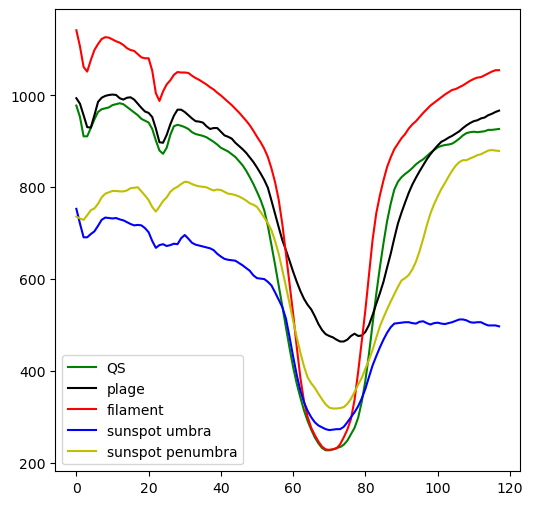

In [9]:
colors = ['g','k','r','b','y']

plt.figure(figsize = (6,6))
for i in range(5):
    plt.plot(np.arange(118), hdu_data[:, coords[i][1], coords[i][0]], ls = '-', color = colors[i], label = labels[i])

plt.legend()
plt.show()